In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams["figure.dpi"] = 802

def remove_frame():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

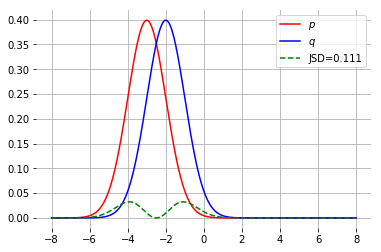

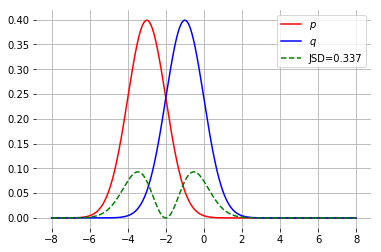

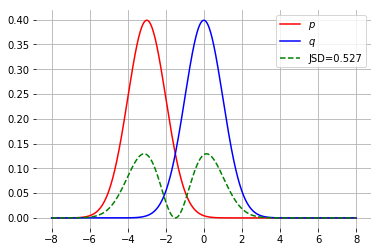

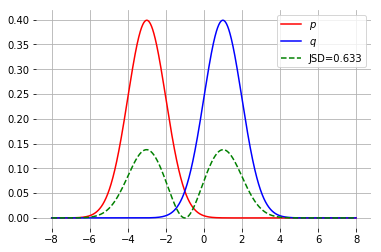

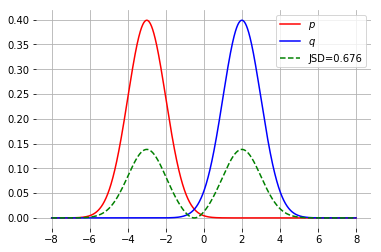

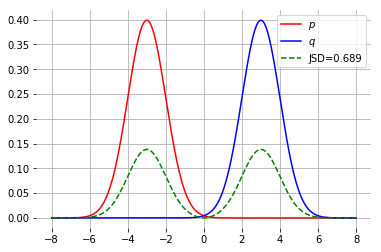

In [49]:
# KL, JSD
def gaussian(x, mu=0.0, sigma=1.0):
    return 1. / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2))

def kl(p, q):
    return p * (np.log(p) - np.log(q))

def jsd(p, q):
    m = (p+q) / 2.0
    return 0.5 * (kl(p, m) + kl(q, m))

for mu in [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0]:
    xs = np.linspace(-8,8, num=2000)
    p = gaussian(xs, mu=-3.0, sigma=1.0)
    plt.plot(xs, p, c="r", label="$p$")
    q = gaussian(xs, mu=mu, sigma=1.0)
    plt.plot(xs, q, c="b", label="$q$")
    jsd_pq = jsd(p, q)
    divergence = (jsd_pq * (xs[1] - xs[0])).sum()
    plt.plot(xs, jsd_pq, "g--", label="JSD=%.3f" % divergence)
    plt.legend()
    plt.grid()
    remove_frame()

    plt.savefig("jsd-%d.png" % mu)
    plt.show()

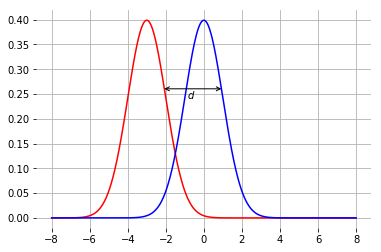

In [107]:
mu=0.0

xs = np.linspace(-8,8, num=2000)
p = gaussian(xs, mu=-3.0, sigma=1.0)
plt.plot(xs, p, c="r", label="$p$")
q = gaussian(xs, mu=mu, sigma=1.0)
plt.plot(xs, q, c="b", label="$q$")
jsd_pq = jsd(p, q)
divergence = (jsd_pq * (xs[1] - xs[0])).sum()
#plt.plot(xs, jsd_pq, "g--", label="JSD=%.3f" % divergence)

plt.grid()

i = 650
#plt.arrow(xs[i], q[i], 0, p[i]-q[i],head_width=0.3, head_length=0.02, length_includes_head=True,  fc='k', ec='k')
#plt.annotate(s='', xy=(xs[i], q[i]), xytext=(xs[i],p[i]), arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))


i = 740
plt.annotate(s="$d$", xy=(xs[i]+(p[i]-xs[i])/2, p[i]-0.02))
plt.annotate(s='', xy=(xs[i], p[i]), xytext=(xs[i]+3.0,p[i]), arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))
remove_frame()

plt.savefig("emd.png")
plt.show()